In [12]:
import numpy as np
import matplotlib
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
import os
directory_path = "./model"

os.chdir(directory_path)


In [14]:
img = cv2.imread('./test_images/elizabeth olsen 2023.jpg')
img.shape

(2191, 2921, 3)

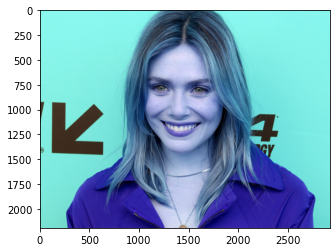

In [15]:
plt.imshow(img)

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(2191, 2921)

In [17]:
gray

array([[232, 232, 232, ...,  69,  66,  69],
       [232, 232, 232, ...,  86,  84,  86],
       [233, 233, 233, ..., 105, 104, 111],
       ...,
       [213, 212, 211, ..., 205, 206, 207],
       [213, 212, 211, ..., 205, 206, 207],
       [213, 212, 210, ..., 206, 206, 207]], dtype=uint8)

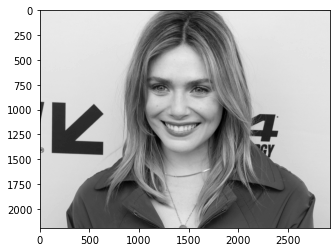

In [18]:
plt.imshow(gray, cmap='gray')

In [19]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 905,  406, 1003, 1003]])

In [20]:
(x,y,w,h) = faces[0]
x,y,w,h

(905, 406, 1003, 1003)

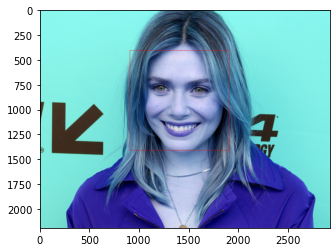

In [21]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

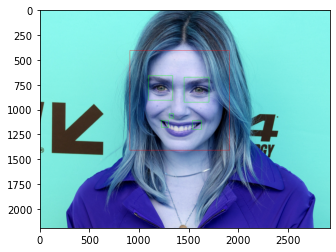

In [22]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

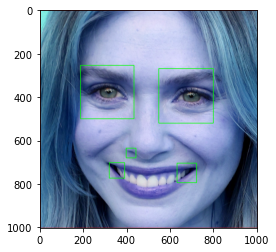

In [23]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [24]:
cropped_img = np.array(roi_color)
cropped_img.shape

(1003, 1003, 3)

In [25]:
import pywt    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

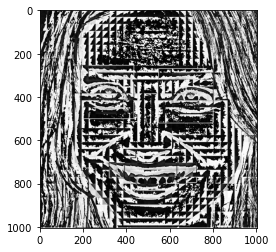

In [26]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [27]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None


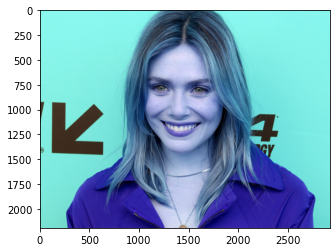

In [28]:
original_image = cv2.imread('./test_images/elizabeth olsen 2023.jpg')
plt.imshow(original_image)

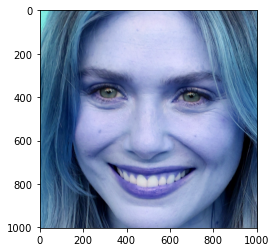

In [31]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/elizabeth olsen 2023.jpg')
plt.imshow(cropped_image)

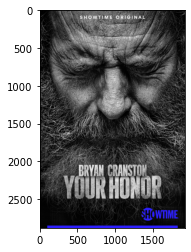

In [32]:
org_image_obstructed = cv2.imread('./test_images/123.jpg')
plt.imshow(org_image_obstructed)

In [33]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/1.jpg')
cropped_image_no_2_eyes

In [34]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [35]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [36]:
img_dirs

['./dataset/cropped',
 './dataset/elizabeth olsen - Google Search',
 './dataset/leonardo dicaprio - Google Search',
 './dataset/robert downey jr - Google Search',
 './dataset/shahrukh khan - Google Search']

In [37]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [38]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1




Generating cropped images in folder:  ./dataset/cropped/elizabeth olsen - Google Search
Generating cropped images in folder:  ./dataset/cropped/leonardo dicaprio - Google Search
Generating cropped images in folder:  ./dataset/cropped/robert downey jr - Google Search
Generating cropped images in folder:  ./dataset/cropped/shahrukh khan - Google Search


In [39]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'elizabeth olsen - Google Search': ['./dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search1.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search10.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search11.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search12.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search13.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search14.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search15.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search16.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search17.png',
  './dataset/cropped/elizabeth olsen - Google Search\\elizabeth olsen - Google Search18.png',
  './dataset/cropped/eliza

In [40]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'elizabeth olsen - Google Search': 0,
 'leonardo dicaprio - Google Search': 1,
 'robert downey jr - Google Search': 2,
 'shahrukh khan - Google Search': 3}

In [41]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [42]:
len(X[0])


4096

In [43]:
32*32*3 + 32*32

4096

In [44]:
X[0]

array([[217],
       [220],
       [228],
       ...,
       [215],
       [ 28],
       [ 37]], dtype=uint8)

In [45]:
y[0]

0

In [46]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(240, 4096)

Image Cleaning and Processing is Done now we'll train our model

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.65

In [49]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        17
           1       0.83      0.59      0.69        17
           2       0.75      0.23      0.35        13
           3       0.55      0.92      0.69        13

    accuracy                           0.65        60
   macro avg       0.69      0.64      0.61        60
weighted avg       0.70      0.65      0.62        60



In [57]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [58]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'svc__C': [0.1, 1, 10],
            'svc__kernel': ['linear', 'rbf']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'svc__C': [1, 5, 10]
        }
    }
}

In [59]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.772222,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,SVC,0.772222,"{'svc__C': 0.1, 'svc__kernel': 'linear'}"
2,logistic_regression,0.744444,{'svc__C': 5}


In [60]:
best_estimators

{'svm': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svc', SVC(C=1, kernel='linear'))]),
 'SVC': Pipeline(steps=[('scaler', StandardScaler()),
                 ('svc', SVC(C=0.1, kernel='linear'))]),
 'logistic_regression': Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=5))])}

In [61]:
best_estimators['svm'].score(X_test,y_test)

0.7333333333333333

In [62]:
best_estimators['SVC'].score(X_test,y_test)

0.7333333333333333

In [63]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.65

In [64]:
best_clf = best_estimators['svm']

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  1,  0,  1],
       [ 2, 12,  1,  2],
       [ 0,  6,  5,  2],
       [ 1,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

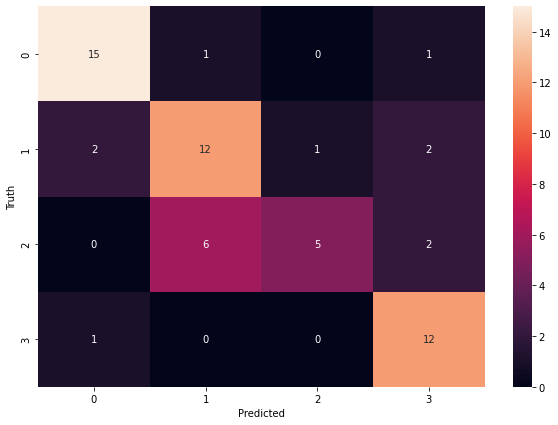

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
class_dict

{'elizabeth olsen - Google Search': 0,
 'leonardo dicaprio - Google Search': 1,
 'robert downey jr - Google Search': 2,
 'shahrukh khan - Google Search': 3}

In [68]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [69]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))